In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [ ]:
!git clone https://github.com/febinshanasreen/DataSets.git

fatal: destination path 'DataSets' already exists and is not an empty directory.


In [ ]:
df1= pd.read_csv('/content/DataSets/Cab_Data.csv')
df1['Date of Travel'] = df1['Date of Travel'].astype('datetime64')
df1['Profit']= df1['Price Charged'] - df1['Cost of Trip'] # A new column created to find the profit


In [ ]:
df1 = df1.sort_values(by=['Date of Travel']) #Sort the whole data frame accoding to the "Date of Travel"
df1=df1.reset_index()
df1=df1.drop(["index"],axis=1)
df1

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,66.6760
1,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,164.9960
2,10000635,2016-01-02,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,195.7548
3,10001001,2016-01-02,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,796.6140
4,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,122.0660
...,...,...,...,...,...,...,...,...
359387,10435011,2018-12-31,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,18.8980
359388,10433309,2018-12-31,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,8.1600
359389,10435915,2018-12-31,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,-2.8388
359390,10439845,2018-12-31,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,151.8488


In [ ]:
df1["Day"]=df1["Date of Travel"].apply(lambda x:x.day)
df1["Month"]=df1["Date of Travel"].apply(lambda x:x.month)
df1["Year"]=df1["Date of Travel"].apply(lambda x:x.year)
df1["Weekday"]=df1["Date of Travel"].apply(lambda x:calendar.day_name[x.weekday()]) # Date of travel is splitted
df1

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Day,Month,Year,Weekday
0,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,66.6760,2,1,2016,Saturday
1,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,164.9960,2,1,2016,Saturday
2,10000635,2016-01-02,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,195.7548,2,1,2016,Saturday
3,10001001,2016-01-02,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,796.6140,2,1,2016,Saturday
4,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,122.0660,2,1,2016,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10435011,2018-12-31,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,18.8980,31,12,2018,Monday
359388,10433309,2018-12-31,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,8.1600,31,12,2018,Monday
359389,10435915,2018-12-31,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,-2.8388,31,12,2018,Monday
359390,10439845,2018-12-31,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,151.8488,31,12,2018,Monday


In [ ]:
df2= pd.read_csv('/content/DataSets/Customer_ID.csv')

In [ ]:
df3= pd.read_csv('/content/DataSets/Transaction_ID.csv')

In [ ]:
df4= pd.read_csv('/content/DataSets/City.csv')

In [ ]:
df=df2.merge(df3, on='Customer ID').merge(df1, on='Transaction ID').merge(df4, on='City')
df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Day,Month,Year,Weekday,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,8,1,2016,Friday,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,21,7,2018,Saturday,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,23,11,2018,Friday,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,6,1,2016,Wednesday,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,21,4,2018,Saturday,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,3,3,2018,Saturday,"418,859","127,001"
359388,51406,Female,29,6829,10319775,Cash,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,13,4,2018,Friday,"418,859","127,001"
359389,51406,Female,29,6829,10347676,Card,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,6,7,2018,Friday,"418,859","127,001"
359390,51406,Female,29,6829,10358624,Cash,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,2,8,2018,Thursday,"418,859","127,001"


In [ ]:
df_goupby1=df.groupby(["Company","Year"])["Profit"].agg(["count"]) #Formed a new table with year and sum
df_goupby1.reset_index(inplace=True)
df_goupby1.rename(columns={'count': 'Total Count'}, inplace=True)
df_goupby1

,Company,Year,Total Count
0,Pink Cab,2016,25080
1,Pink Cab,2017,30321
2,Pink Cab,2018,29310
3,Yellow Cab,2016,82239
4,Yellow Cab,2017,98189
5,Yellow Cab,2018,94253


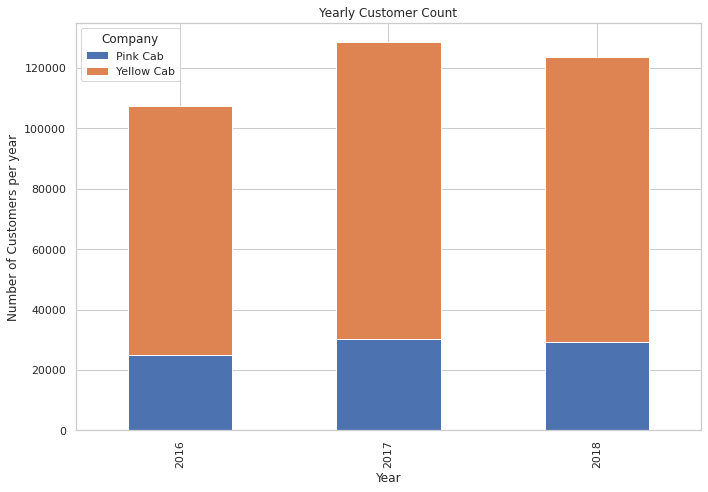

In [ ]:
df_goupby1.pivot("Year", "Company", "Total Count").plot(kind='bar', stacked=True, figsize=(10,7))
plt.title(label='Yearly Customer Count')
plt.ylabel('Number of Customers per year')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


In [ ]:
df_goupby2=df.groupby(["Company","Year"])["Profit"].agg(["sum"]) #Formed a new table with year and sum
df_goupby2.reset_index(inplace=True)
df_goupby2.rename(columns={'sum': 'Total Profit'}, inplace=True)
df_goupby2

,Company,Year,Total Profit
0,Pink Cab,2016,1.713511e+06
1,Pink Cab,2017,2.033655e+06
2,Pink Cab,2018,1.560162e+06
3,Yellow Cab,2016,1.392700e+07
4,Yellow Cab,2017,1.657598e+07
5,Yellow Cab,2018,1.351740e+07


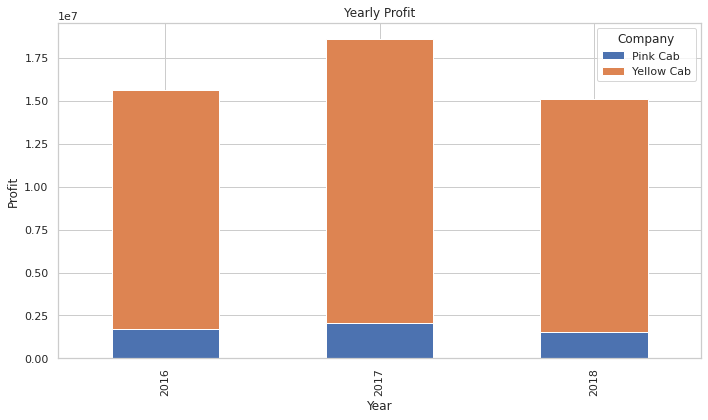

In [ ]:
df_goupby2.pivot("Year", "Company", "Total Profit").plot(kind='bar', stacked=True, figsize=(10,6))
plt.title(label='Yearly Profit')
plt.ylabel('Profit')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_goupby3=df.groupby(["City","Company"])["Profit"].sum().unstack()
df_goupby3

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,96050.076,7.463828e+05
AUSTIN TX,147445.290,3.792557e+05
BOSTON MA,262001.698,1.506718e+06
CHICAGO IL,318722.488,3.068591e+06
DALLAS TX,24730.112,1.104003e+06
DENVER CO,40584.939,3.570001e+05
LOS ANGELES CA,1125732.065,3.285977e+06
MIAMI FL,162301.191,5.960001e+05
NASHVILLE TN,64284.534,8.524768e+04


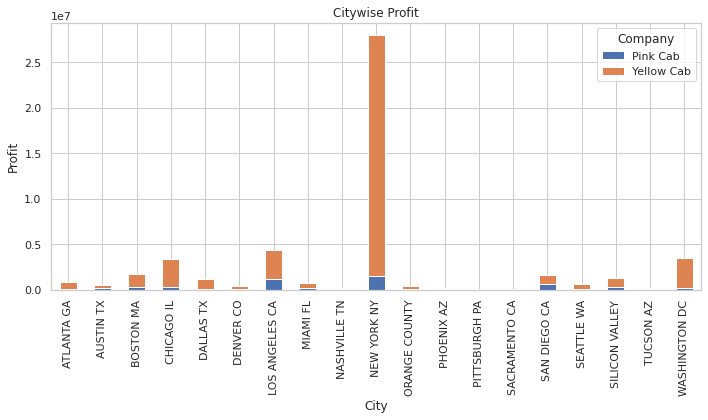

In [ ]:
df_goupby3.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title(label='Citywise Profit')
plt.ylabel('Profit')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [ ]:

df_goupby4=df.groupby(["Year", "Gender", "Company"])["Profit"].sum().unstack()
df_goupby4

Company         Pink Cab    Yellow Cab
Year Gender                           
2016 Female   736301.650  5.581321e+06
     Male     977209.574  8.345674e+06
2017 Female   896924.976  6.904150e+06
     Male    1136729.932  9.671828e+06
2018 Female   697306.065  5.645946e+06
     Male     862856.124  7.871454e+06

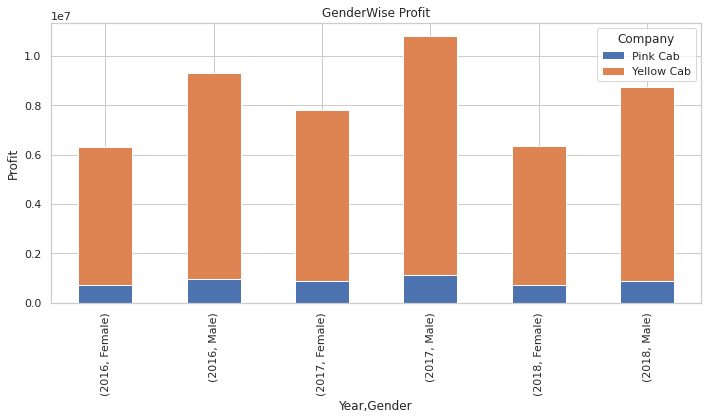

In [ ]:
df_goupby4.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title(label='GenderWise Profit')
plt.ylabel('Profit')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

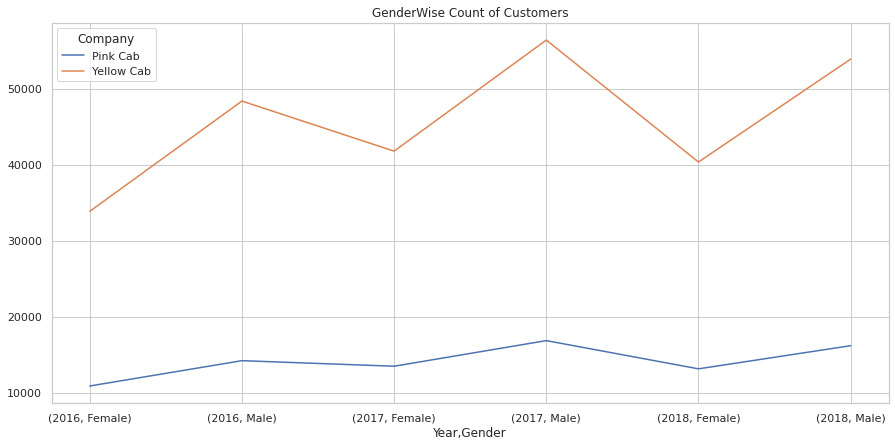

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title(label='GenderWise Count of Customers')
# use unstack()
df_goupby4= df.groupby(['Year','Gender', 'Company']).count()['Profit'].unstack().plot(ax=ax)

In [ ]:
df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Day,Month,Year,Weekday,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,8,1,2016,Friday,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,21,7,2018,Saturday,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,23,11,2018,Friday,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,6,1,2016,Wednesday,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,21,4,2018,Saturday,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,3,3,2018,Saturday,"418,859","127,001"
359388,51406,Female,29,6829,10319775,Cash,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,13,4,2018,Friday,"418,859","127,001"
359389,51406,Female,29,6829,10347676,Card,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,6,7,2018,Friday,"418,859","127,001"
359390,51406,Female,29,6829,10358624,Cash,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,2,8,2018,Thursday,"418,859","127,001"


In [ ]:
incm= df.copy()
bins=[2500,15000,35000]
names=['2500-15000', '>15000']
incm['Income (USD/Month)']= pd.cut(incm['Income (USD/Month)'], bins,labels=names)
incm.head()


,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Day,Month,Year,Weekday,Population,Users
0,29290,Male,28,2500-15000,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,8,1,2016,Friday,"814,885","24,701"
1,29290,Male,28,2500-15000,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,21,7,2018,Saturday,"814,885","24,701"
2,29290,Male,28,2500-15000,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,23,11,2018,Friday,"814,885","24,701"
3,27703,Male,27,2500-15000,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,6,1,2016,Wednesday,"814,885","24,701"
4,27703,Male,27,2500-15000,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,21,4,2018,Saturday,"814,885","24,701"


In [ ]:
NewIncm=incm.groupby(['Company', 'Year', 'Income (USD/Month)']).Profit.agg(['sum'])
NewIncm.rename(columns={'sum':'Profit'},inplace=True)
NewIncm=NewIncm.reset_index()
NewIncm

,Company,Year,Income (USD/Month),Profit
0,Pink Cab,2016,2500-15000,8.185171e+05
1,Pink Cab,2016,>15000,8.632439e+05
2,Pink Cab,2017,2500-15000,9.956372e+05
3,Pink Cab,2017,>15000,9.965370e+05
4,Pink Cab,2018,2500-15000,7.656181e+05
5,Pink Cab,2018,>15000,7.605816e+05
6,Yellow Cab,2016,2500-15000,6.803840e+06
7,Yellow Cab,2016,>15000,6.865904e+06
8,Yellow Cab,2017,2500-15000,8.033054e+06
9,Yellow Cab,2017,>15000,8.215257e+06


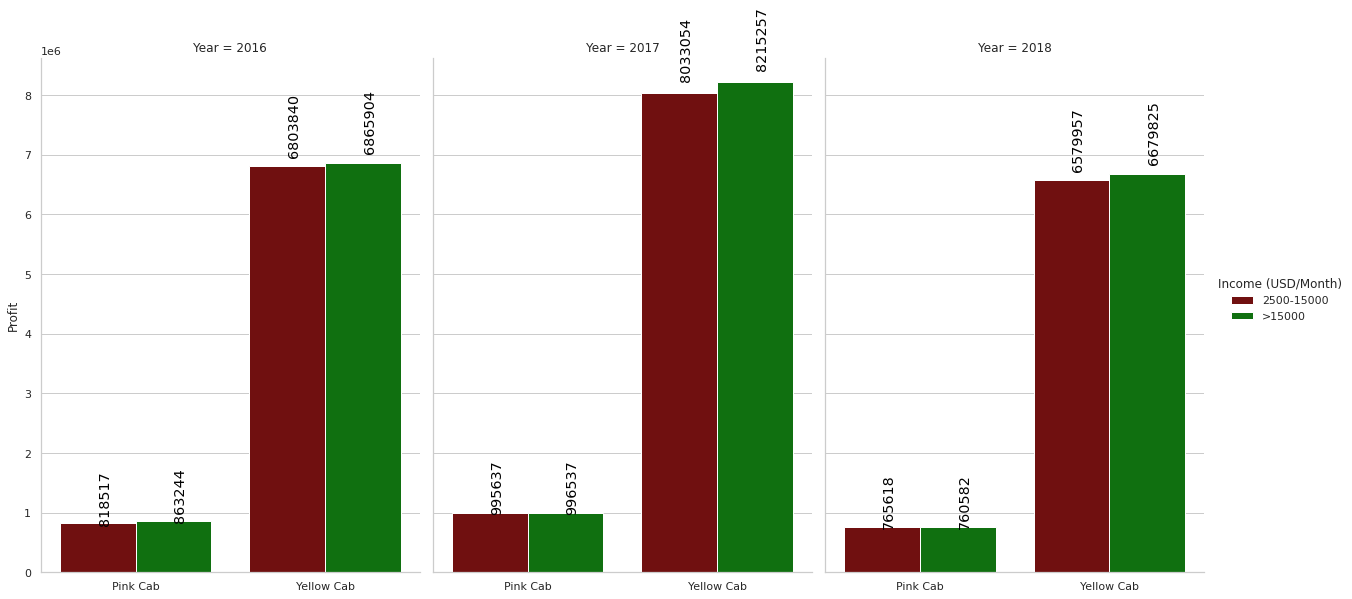

In [ ]:
r= sns.catplot(x='Company', y='Profit', hue='Income (USD/Month)', col='Year', data=NewIncm, kind='bar', height=8, aspect=0.7, palette=['maroon', 'green'],legend='NewIncm')
bi=[0,1,2]
for i in bi:
  m= r.facet_axis(0,i)
  for p in m.patches:
    m.text(p.get_x() + p.get_width()/2.,
           p.get_height()* 1.03,
        '{0:.0f}'.format(p.get_height()),color='black', rotation='vertical', size='large')
  plt.xticks(rotation=0)
  plt.xlabel('')


In [ ]:
agegroup= df.copy()
bins=[18, 26, 40, 60, 70]
labels = ['18-25', '26-40', '41-60', '60+']
agegroup['Age']= pd.cut(agegroup['Age'], bins,labels=labels)
agegroup

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Day,Month,Year,Weekday,Population,Users
0,29290,Male,26-40,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,8,1,2016,Friday,"814,885","24,701"
1,29290,Male,26-40,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,21,7,2018,Saturday,"814,885","24,701"
2,29290,Male,26-40,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,23,11,2018,Friday,"814,885","24,701"
3,27703,Male,26-40,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,6,1,2016,Wednesday,"814,885","24,701"
4,27703,Male,26-40,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,21,4,2018,Saturday,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,26-40,6829,10307228,Cash,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,3,3,2018,Saturday,"418,859","127,001"
359388,51406,Female,26-40,6829,10319775,Cash,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,13,4,2018,Friday,"418,859","127,001"
359389,51406,Female,26-40,6829,10347676,Card,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,6,7,2018,Friday,"418,859","127,001"
359390,51406,Female,26-40,6829,10358624,Cash,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,2,8,2018,Thursday,"418,859","127,001"


In [ ]:
NewIncmage=agegroup.groupby(['Company', 'Year', 'Age']).Profit.agg(['sum'])
NewIncmage.rename(columns={'sum':'Profit'},inplace=True)
NewIncmage=NewIncmage.reset_index()
NewIncmage

,Company,Year,Age,Profit
0,Pink Cab,2016,18-25,4.423292e+05
1,Pink Cab,2016,26-40,7.566680e+05
2,Pink Cab,2016,41-60,3.652666e+05
3,Pink Cab,2016,60+,9.539729e+04
4,Pink Cab,2017,18-25,5.558750e+05
5,Pink Cab,2017,26-40,8.749009e+05
6,Pink Cab,2017,41-60,4.302286e+05
7,Pink Cab,2017,60+,1.041023e+05
8,Pink Cab,2018,18-25,4.254217e+05
9,Pink Cab,2018,26-40,6.838440e+05


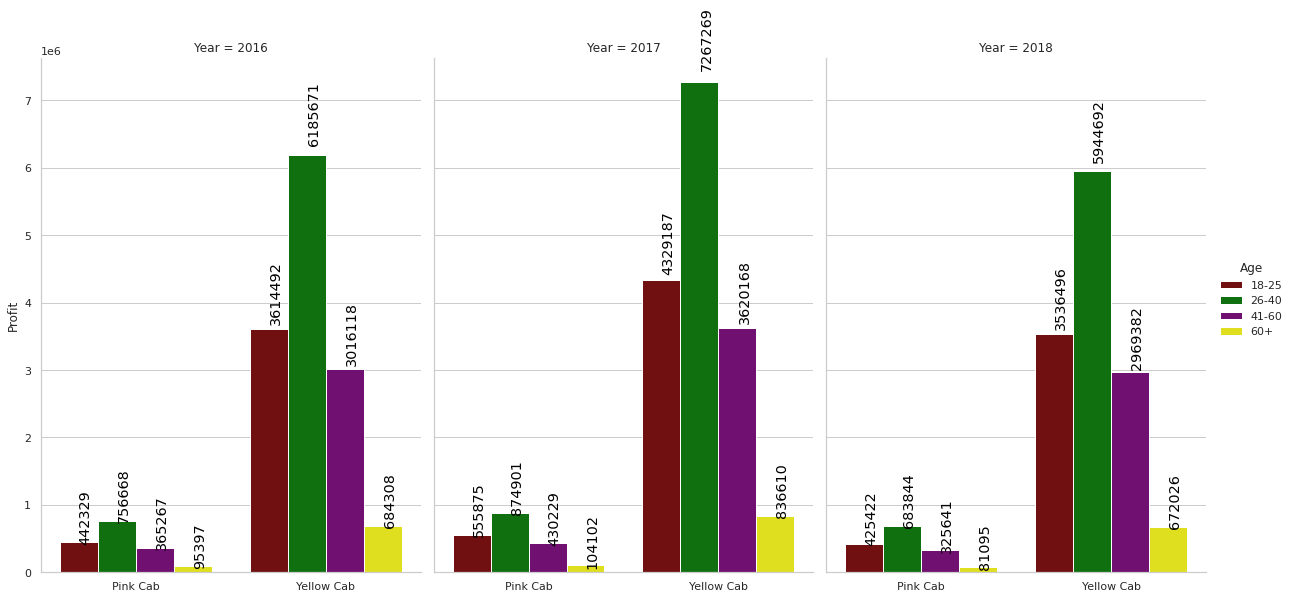

In [ ]:
a= sns.catplot(x='Company', y='Profit', hue='Age', col='Year', data=NewIncmage, kind='bar', height=8, aspect=0.7, palette=['maroon', 'green', 'purple', 'yellow'],legend='NewIncmage')
bi=[0,1,2]
for i in bi:
  m= a.facet_axis(0,i)
  for p in m.patches:
    m.text(p.get_x() + p.get_width()/2.,
           p.get_height()* 1.03,
        '{0:.0f}'.format(p.get_height()),color='black', rotation='vertical', size='large')
  plt.xticks(rotation=0)
  #plt.title(label='AgeWise Profit - Customers')
  plt.xlabel('')


In [ ]:
df

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Day,Month,Year,Weekday,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,8,1,2016,Friday,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,21,7,2018,Saturday,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,23,11,2018,Friday,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,6,1,2016,Wednesday,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,21,4,2018,Saturday,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,3,3,2018,Saturday,"418,859","127,001"
359388,51406,Female,29,6829,10319775,Cash,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,13,4,2018,Friday,"418,859","127,001"
359389,51406,Female,29,6829,10347676,Card,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,6,7,2018,Friday,"418,859","127,001"
359390,51406,Female,29,6829,10358624,Cash,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,2,8,2018,Thursday,"418,859","127,001"


In [ ]:
occurance= df.copy()
count_series = occurance.groupby(['Company', 'Year', 'Customer ID']).size()
count_series
count_series = count_series.to_frame(name = 'size').reset_index()
count_series

,Company,Year,Customer ID,size
0,Pink Cab,2016,1,1
1,Pink Cab,2016,2,2
2,Pink Cab,2016,3,2
3,Pink Cab,2016,5,2
4,Pink Cab,2016,6,1
...,...,...,...,...
134895,Yellow Cab,2018,59996,3
134896,Yellow Cab,2018,59997,4
134897,Yellow Cab,2018,59998,2
134898,Yellow Cab,2018,59999,4


In [ ]:
occurance10= count_series.copy()
bins=[6,10]
labels = ['6 - 10']
occurance10['size']= pd.cut(count_series['size'], bins,labels=labels)
occurance10= occurance10.dropna()
occurance10

,Company,Year,Customer ID,size
783,Pink Cab,2016,1060,6 - 10
1883,Pink Cab,2016,2526,6 - 10
2734,Pink Cab,2016,3790,6 - 10
4144,Pink Cab,2016,6105,6 - 10
4190,Pink Cab,2016,6159,6 - 10
...,...,...,...,...
134688,Yellow Cab,2018,59779,6 - 10
134765,Yellow Cab,2018,59859,6 - 10
134807,Yellow Cab,2018,59903,6 - 10
134860,Yellow Cab,2018,59959,6 - 10


In [ ]:
occurance10 = occurance10.groupby(['Company', 'Year']).size()
occurance10 = occurance10.to_frame(name = 'Count').reset_index()
occurance10

,Company,Year,Count
0,Pink Cab,2016,19
1,Pink Cab,2017,42
2,Pink Cab,2018,34
3,Yellow Cab,2016,2562
4,Yellow Cab,2017,3040
5,Yellow Cab,2018,2952


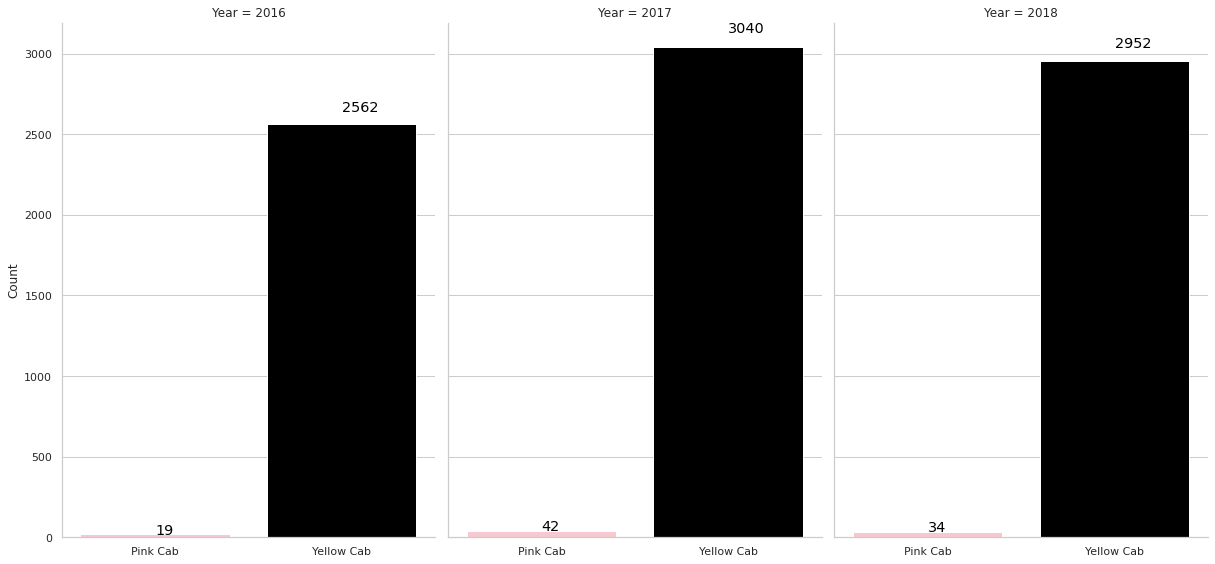

In [ ]:
r= sns.catplot(x='Company', y='Count', col='Year', data=occurance10, kind='bar', height=8, aspect=0.7, palette=['pink', 'black'],legend='count_series5')
bi=[0,1,2]
for i in bi:
  m= r.facet_axis(0,i)
  for p in m.patches:
    m.text(p.get_x() + p.get_width()/2.,
           p.get_height()* 1.03,
        '{0:.0f}'.format(p.get_height()),color='black', rotation='horizontal', size='large')
  plt.xticks(rotation=0)
  plt.xlabel('')

In [ ]:
occurance5= count_series.copy()
bins=[0,5]
labels = ['0-5']
occurance5['size']= pd.cut(count_series['size'], bins,labels=labels)
occurance5= occurance5.dropna()
occurance5

,Company,Year,Customer ID,size
0,Pink Cab,2016,1,0-5
1,Pink Cab,2016,2,0-5
2,Pink Cab,2016,3,0-5
3,Pink Cab,2016,5,0-5
4,Pink Cab,2016,6,0-5
...,...,...,...,...
134894,Yellow Cab,2018,59995,0-5
134895,Yellow Cab,2018,59996,0-5
134896,Yellow Cab,2018,59997,0-5
134897,Yellow Cab,2018,59998,0-5


In [ ]:
occurance5 = occurance5.groupby(['Company', 'Year']).size()
occurance5 = occurance5.to_frame(name = 'Count').reset_index()
occurance5

,Company,Year,Count
0,Pink Cab,2016,16601
1,Pink Cab,2017,18508
2,Pink Cab,2018,18290
3,Yellow Cab,2016,21403
4,Yellow Cab,2017,21895
5,Yellow Cab,2018,21823


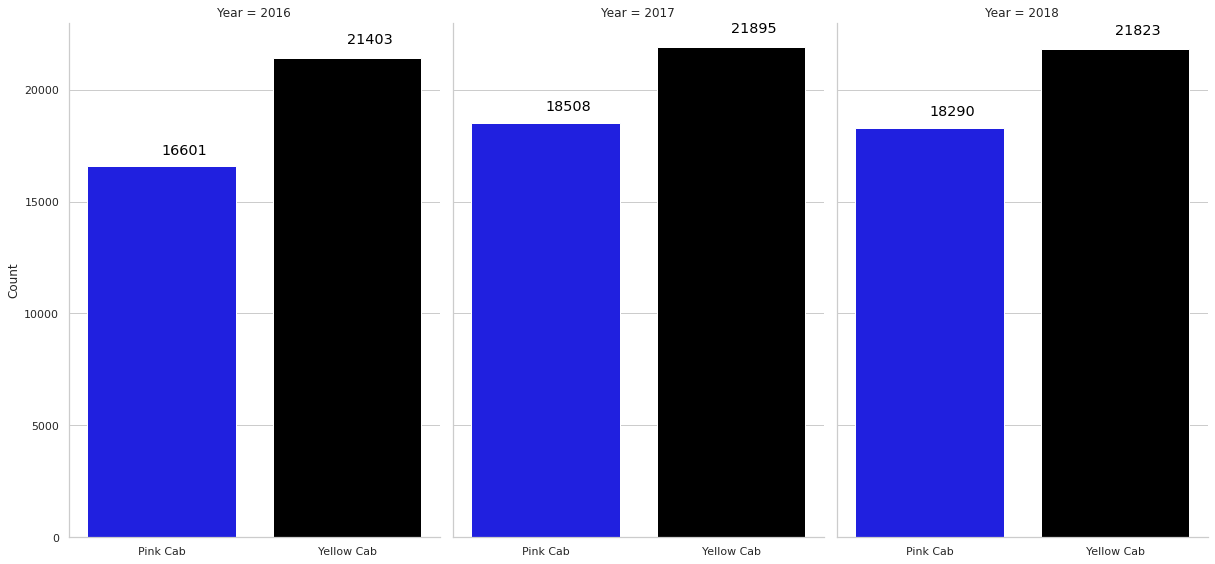

In [ ]:
r= sns.catplot(x='Company', y='Count', col='Year', data=occurance5, kind='bar', height=8, aspect=0.7, palette=['blue', 'black'],legend='occurance5')
bi=[0,1,2]
for i in bi:
  m= r.facet_axis(0,i)
  for p in m.patches:
    m.text(p.get_x() + p.get_width()/2.,
           p.get_height()* 1.03,
        '{0:.0f}'.format(p.get_height()),color='black', rotation='horizontal', size='large')
  plt.xticks(rotation=0)
  plt.xlabel('')

In [ ]:
kmtravel= df.copy()
kmtravel

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Day,Month,Year,Weekday,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,8,1,2016,Friday,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,21,7,2018,Saturday,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,23,11,2018,Friday,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,6,1,2016,Wednesday,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,21,4,2018,Saturday,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,3,3,2018,Saturday,"418,859","127,001"
359388,51406,Female,29,6829,10319775,Cash,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,13,4,2018,Friday,"418,859","127,001"
359389,51406,Female,29,6829,10347676,Card,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,6,7,2018,Friday,"418,859","127,001"
359390,51406,Female,29,6829,10358624,Cash,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,2,8,2018,Thursday,"418,859","127,001"


In [ ]:
bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45']
kmtravel['KM Travelled']= pd.cut(kmtravel['KM Travelled'], bins,labels=labels)
kmtravel

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Day,Month,Year,Weekday,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30,370.95,313.6350,57.3150,8,1,2016,Friday,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,25,598.70,317.4228,281.2772,21,7,2018,Saturday,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,40,792.05,597.4020,194.6480,23,11,2018,Friday,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,25,358.52,334.8540,23.6660,6,1,2016,Wednesday,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,35,721.10,467.1192,253.9808,21,4,2018,Saturday,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,2018-03-03,Yellow Cab,WASHINGTON DC,35,668.93,525.3120,143.6180,3,3,2018,Saturday,"418,859","127,001"
359388,51406,Female,29,6829,10319775,Cash,2018-04-13,Yellow Cab,WASHINGTON DC,0,67.60,44.5536,23.0464,13,4,2018,Friday,"418,859","127,001"
359389,51406,Female,29,6829,10347676,Card,2018-07-06,Yellow Cab,WASHINGTON DC,20,331.97,337.8240,-5.8540,6,7,2018,Friday,"418,859","127,001"
359390,51406,Female,29,6829,10358624,Cash,2018-08-02,Yellow Cab,WASHINGTON DC,25,358.23,364.3200,-6.0900,2,8,2018,Thursday,"418,859","127,001"


In [ ]:
kmtravel1 = kmtravel.groupby(["KM Travelled","Company"])["Customer ID"].count().unstack()
kmtravel1

Company,Pink Cab,Yellow Cab
KM Travelled,,
0,6976,22802
5,10183,32749
10,10086,32783
15,10327,33106
20,10103,33111
25,10165,33013
30,10030,32525
35,9877,31997
40,5700,18428


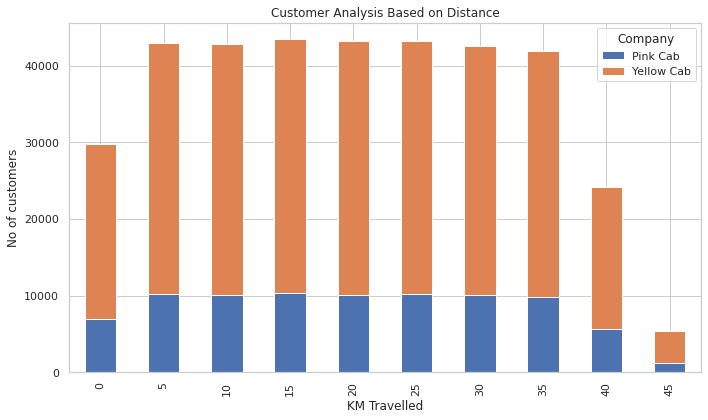

In [ ]:
kmtravel1.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title(label='Customer Analysis Based on Distance')
plt.ylabel('No of customers')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [ ]:

Daywise = df.groupby(["Weekday","Company"])["Customer ID"].count()
Daywise = Daywise.to_frame(name = 'Count').reset_index()
Daywise

,Weekday,Company,Count
0,Friday,Pink Cab,19249
1,Friday,Yellow Cab,62153
2,Monday,Pink Cab,7032
3,Monday,Yellow Cab,22705
4,Saturday,Pink Cab,18253
5,Saturday,Yellow Cab,59981
6,Sunday,Pink Cab,16475
7,Sunday,Yellow Cab,53835
8,Thursday,Pink Cab,9549
9,Thursday,Yellow Cab,30198


TypeError: ignored

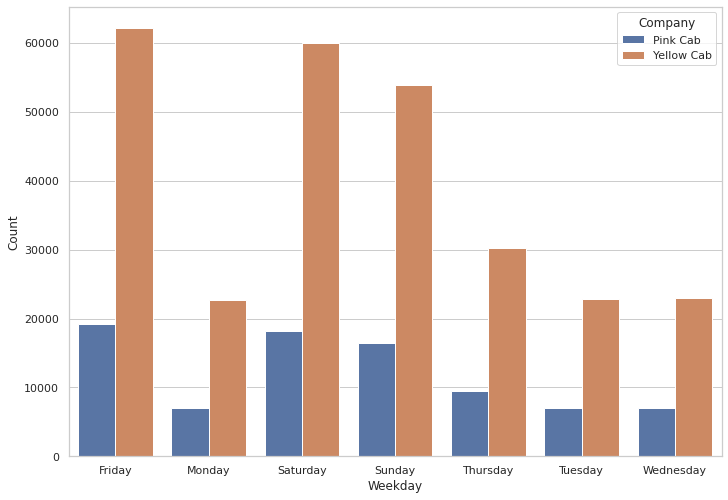

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Weekday", y="Count", hue="Company", data=Daywise)
sns.set(Daywise={'figure.figsize':(11.7,8.27)})

In [ ]:
Daywise2 = df.groupby(["Weekday","Company"])["Profit"].sum().unstack()
Daywise2

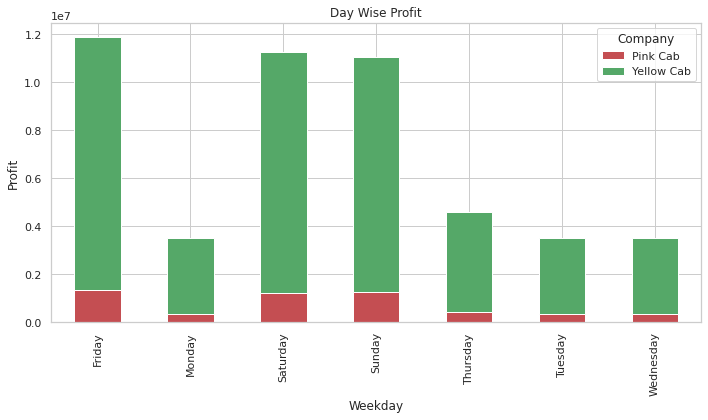

In [ ]:
Daywise2.plot(kind="bar", stacked=True, figsize=(10,6), color='rgb')
plt.title(label='Day Wise Profit')
plt.ylabel('Profit')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

In [ ]:
Citywisecust = df.groupby(["City","Company"])["Customer ID"].count().unstack()
Citywisecust

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


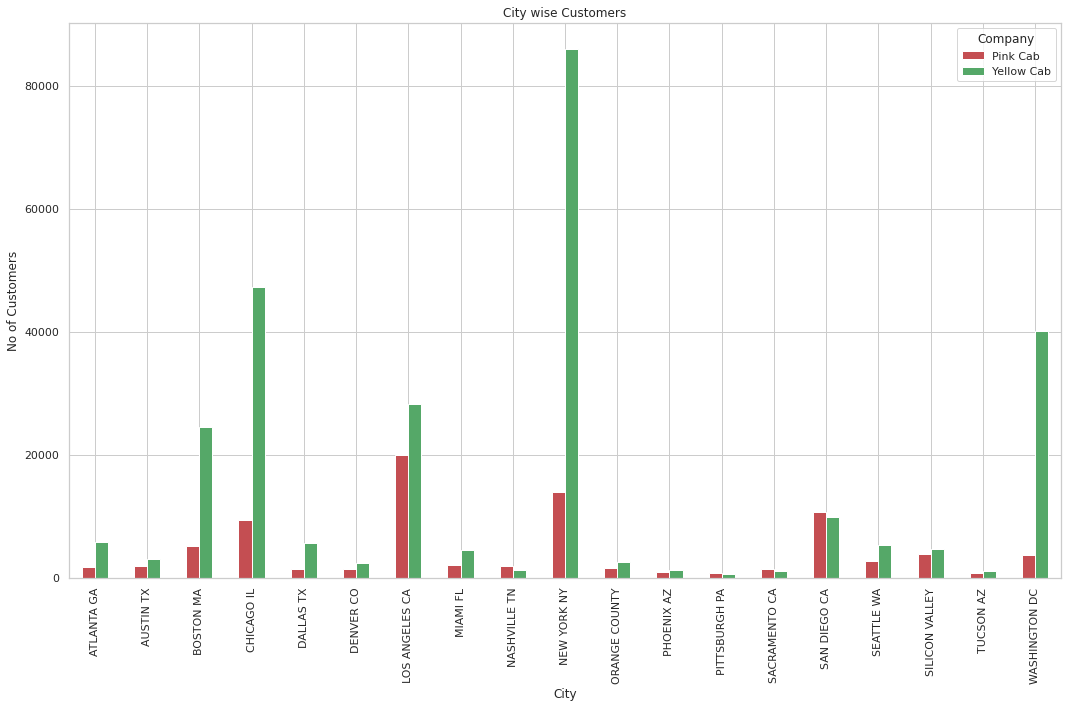

In [ ]:
Citywisecust.plot(kind="bar",figsize=(15,10), color='rgb')
plt.title(label='City wise Customers')
plt.ylabel('No of Customers')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [ ]:
dforcast=df.groupby(['Company', 'Year'])['Profit'].sum().unstack()
dforcast

In [ ]:
dforcast=df.groupby(['Company', 'Year'])['Profit'].sum().unstack()
dforcast